In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(4000)
print(sys.getrecursionlimit())

3000
4000


### Reading the data

In [2]:
data1 = pd.read_csv('TravelData.csv')
print(data1)

         UserID  PurchaseID             TIMESPSS  Duration DEVICE_TYPE  \
0          9558           1  2016-03-12 22:18:34     5.786      MOBILE   
1          9558           1  2016-03-13 05:25:49    65.725      MOBILE   
2          9558           1  2016-03-13 12:26:21     6.492      MOBILE   
3          9657           2  2015-07-18 13:00:38    57.000       FIXED   
4             1           3  2015-08-07 19:16:59   120.000       FIXED   
...         ...         ...                  ...       ...         ...   
2456409    7279       29012  2015-08-21 22:01:43     3.000       FIXED   
2456410    7279       29012  2015-09-10 13:01:19    29.000       FIXED   
2456411    7279       29012  2015-09-10 13:01:49   120.000       FIXED   
2456412    7279       29012  2015-09-15 09:20:33   179.000       FIXED   
2456413    7279       29012  2015-09-15 09:23:32     7.000       FIXED   

         type_touch  purchase_own  purchase_any  MobilePanel  FixedPanel  
0                 7             0   

In [3]:
data2 = pd.read_csv('TravelDataDemos.csv')
print(data2)

      UserID  SPSS_Regio5  RESP_GEM_GROOTTE  BAS_huishoudgrootte  GenderID  \
0       9558          NaN               NaN                  NaN       NaN   
1       9657          NaN               NaN                  NaN       NaN   
2          1          5.0               6.0                  1.0       1.0   
3          2          3.0               3.0                  2.0       2.0   
4          3          NaN               NaN                  NaN       NaN   
...      ...          ...               ...                  ...       ...   
9673    7276          NaN               NaN                  NaN       NaN   
9674    7277          NaN               NaN                  NaN       NaN   
9675    8828          4.0               3.0                  4.0       1.0   
9676    7278          3.0               5.0                  1.0       2.0   
9677    7279          4.0               6.0                  3.0       1.0   

       Age  BAS_werkzaamheid_resp  BAS_bruto_jaarinkomen  \
0  

### Merging the two datasets

In [4]:
merged_df = pd.merge(data1, data2, on='UserID')

In [5]:
print(merged_df)

         UserID  PurchaseID             TIMESPSS  Duration DEVICE_TYPE  \
0          9558           1  2016-03-12 22:18:34     5.786      MOBILE   
1          9558           1  2016-03-13 05:25:49    65.725      MOBILE   
2          9558           1  2016-03-13 12:26:21     6.492      MOBILE   
3          9657           2  2015-07-18 13:00:38    57.000       FIXED   
4             1           3  2015-08-07 19:16:59   120.000       FIXED   
...         ...         ...                  ...       ...         ...   
2456409    7279       29012  2015-08-21 22:01:43     3.000       FIXED   
2456410    7279       29012  2015-09-10 13:01:19    29.000       FIXED   
2456411    7279       29012  2015-09-10 13:01:49   120.000       FIXED   
2456412    7279       29012  2015-09-15 09:20:33   179.000       FIXED   
2456413    7279       29012  2015-09-15 09:23:32     7.000       FIXED   

         type_touch  purchase_own  purchase_any  MobilePanel  FixedPanel  ...  \
0                 7           

### Preprocessing

#### Changing columns name from dutch to english

In [6]:
merged_df.rename(columns={'SPSS_Regio5':'Region','RESP_GEM_GROOTTE':'Size_of_Municipality','BAS_huishoudgrootte':'Household_Size','GenderID':'Gender','BAS_werkzaamheid_resp':'Kind_of_work','BAS_bruto_jaarinkomen':'Gross_income','afg_kinderen_huishouden':'no_of_children','AFG_sk2015':'Social_Class','BAS_voltooide_opleiding8_resp':'Education','SPSS_Lifestage':'Lifestage'},inplace=True)
data2.rename(columns={'SPSS_Regio5':'Region','RESP_GEM_GROOTTE':'Size_of_Municipality','BAS_huishoudgrootte':'Household_Size','GenderID':'Gender','BAS_werkzaamheid_resp':'Kind_of_work','BAS_bruto_jaarinkomen':'Gross_income','afg_kinderen_huishouden':'no_of_children','AFG_sk2015':'Social_Class','BAS_voltooide_opleiding8_resp':'Education','SPSS_Lifestage':'Lifestage'},inplace=True)
merged_df.head(6)

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,Size_of_Municipality,Household_Size,Gender,Age,Kind_of_work,Gross_income,no_of_children,Social_Class,Education,Lifestage
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
5,1,4,2015-11-03 12:31:35,459.000,FIXED,1,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0


#### Checking and dropping null values

In [7]:
# Assuming your DataFrame is named 'df'
null_values = merged_df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display the columns with null values and their counts
print(null_counts)

UserID                       0
PurchaseID                   0
TIMESPSS                     0
Duration                141065
DEVICE_TYPE                  0
type_touch                   0
purchase_own                 0
purchase_any                 0
MobilePanel                  0
FixedPanel                   0
Region                  304929
Size_of_Municipality    304929
Household_Size          304929
Gender                  304929
Age                     304929
Kind_of_work            304929
Gross_income            304929
no_of_children          304929
Social_Class            304929
Education               376318
Lifestage               304929
dtype: int64


In [8]:
merged_df = merged_df.dropna()

In [9]:
merged_df

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,...,Size_of_Municipality,Household_Size,Gender,Age,Kind_of_work,Gross_income,no_of_children,Social_Class,Education,Lifestage
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
5,1,4,2015-11-03 12:31:35,459.000,FIXED,1,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
6,1,4,2015-11-03 12:39:22,183.000,FIXED,1,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
7,1,4,2015-11-24 22:29:39,59.000,FIXED,1,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
8,1,4,2015-11-24 22:30:39,5.000,FIXED,1,0,0,0,17,...,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456401,7278,29010,2016-03-01 18:48:30,6.724,FIXED,7,0,0,0,12,...,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0
2456402,7278,29010,2016-03-18 18:51:20,21.138,FIXED,1,0,0,0,12,...,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0
2456403,7278,29010,2016-04-07 20:17:29,58.235,FIXED,1,0,0,0,12,...,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0
2456404,7278,29010,2016-04-08 18:59:46,11.669,FIXED,1,0,0,0,12,...,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0


#### Changing data types of categorical columns

In [10]:
merged_df['Gender'] = merged_df['Gender'].astype('category')
merged_df['Kind_of_work'] = merged_df['Kind_of_work'].astype('category')
merged_df['Social_Class'] = merged_df['Social_Class'].astype('category')
merged_df['DEVICE_TYPE'] = merged_df['DEVICE_TYPE'].astype('category')
merged_df['Region'] = merged_df['Region'].astype('category')
merged_df['Size_of_Municipality'] = merged_df['Size_of_Municipality'].astype('category')
merged_df['Education'] = merged_df['Education'].astype('category')
merged_df['Lifestage'] = merged_df['Lifestage'].astype('category')
merged_df['Gross_income'] = merged_df['Gross_income'].astype('category')
merged_df['purchase_any'] = merged_df['purchase_any'].astype('category')

In [11]:
merged_df.dtypes

UserID                     int64
PurchaseID                 int64
TIMESPSS                  object
Duration                 float64
DEVICE_TYPE             category
type_touch                 int64
purchase_own               int64
purchase_any            category
MobilePanel                int64
FixedPanel                 int64
Region                  category
Size_of_Municipality    category
Household_Size           float64
Gender                  category
Age                      float64
Kind_of_work            category
Gross_income            category
no_of_children           float64
Social_Class            category
Education               category
Lifestage               category
dtype: object

#### Dropping columns with unique values

In [12]:
df_preprocessed = merged_df.drop(['TIMESPSS', 'UserID', 'PurchaseID'], axis=1)

In [13]:
df_preprocessed

,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,Region,Size_of_Municipality,Household_Size,Gender,Age,Kind_of_work,Gross_income,no_of_children,Social_Class,Education,Lifestage
4,120.000,FIXED,7,0,0,0,17,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
5,459.000,FIXED,1,0,0,0,17,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
6,183.000,FIXED,1,0,0,0,17,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
7,59.000,FIXED,1,0,0,0,17,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
8,5.000,FIXED,1,0,0,0,17,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456401,6.724,FIXED,7,0,0,0,12,3.0,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0
2456402,21.138,FIXED,1,0,0,0,12,3.0,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0
2456403,58.235,FIXED,1,0,0,0,12,3.0,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0
2456404,11.669,FIXED,1,0,0,0,12,3.0,5.0,1.0,2.0,49.0,5.0,1.0,0.0,5.0,2.0,2.0


In [14]:
df_preprocessed = df_preprocessed[['Duration', 'DEVICE_TYPE','purchase_any', 'Age', 'Gender', 'Gross_income','Social_Class', 'Kind_of_work', 'Household_Size']]

### Data Analysis

#### Visualisation

In [15]:
# Calculate summary statistics for the primary question
summary_stats = df_preprocessed.describe()
print(summary_stats)


           Duration           Age  Household_Size
count  1.965105e+06  1.965105e+06    1.965105e+06
mean   5.634295e+01  5.163297e+01    2.470843e+00
std    1.099257e+02  1.437140e+01    1.175878e+00
min    0.000000e+00  1.700000e+01    1.000000e+00
25%    6.000000e+00  4.100000e+01    2.000000e+00
50%    1.945000e+01  5.200000e+01    2.000000e+00
75%    5.700000e+01  6.300000e+01    3.000000e+00
max    7.200000e+02  9.200000e+01    1.100000e+01


#### Univariate

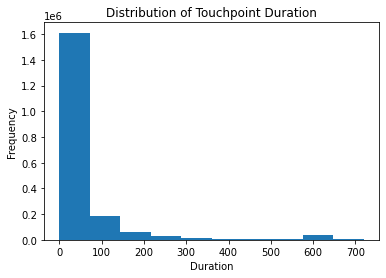

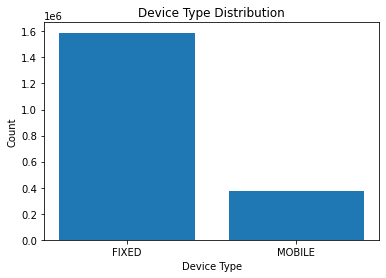

In [16]:
# Histogram of the duration of touchpoints
plt.hist(df_preprocessed['Duration'], bins=10)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Touchpoint Duration')
plt.show()

# Bar plot of device type
device_counts = df_preprocessed['DEVICE_TYPE'].value_counts()
plt.bar(device_counts.index, device_counts.values)
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.title('Device Type Distribution')
plt.show()



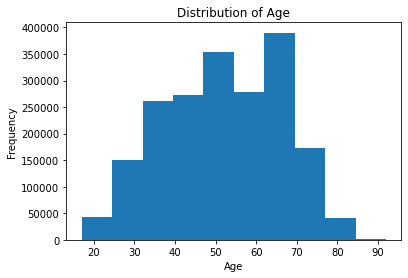

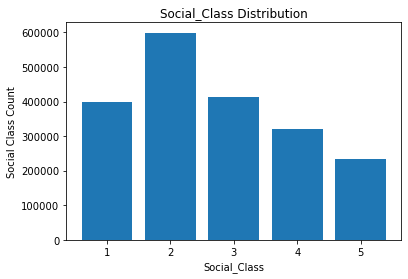

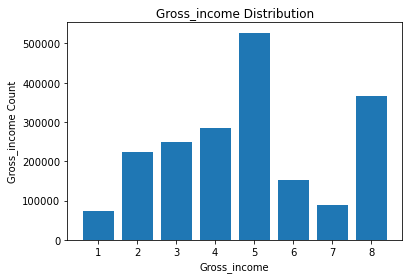

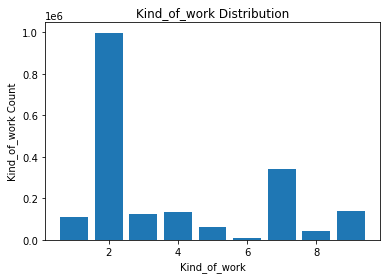

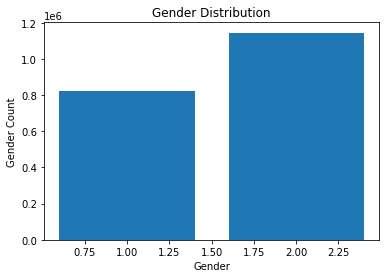

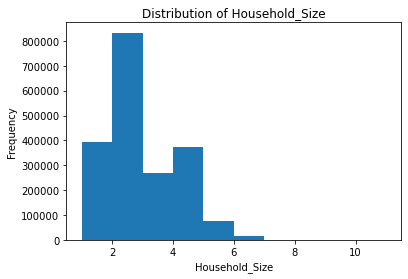

In [17]:
# Histogram of Age
plt.hist(df_preprocessed['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Bar plot of social class 
device_counts = df_preprocessed['Social_Class'].value_counts()
plt.bar(device_counts.index, device_counts.values)
plt.xlabel('Social_Class')
plt.ylabel('Social Class Count')
plt.title('Social_Class Distribution')
plt.show()

# Bar plot of Gross Income
device_counts = df_preprocessed['Gross_income'].value_counts()
plt.bar(device_counts.index, device_counts.values)
plt.xlabel('Gross_income')
plt.ylabel('Gross_income Count')
plt.title('Gross_income Distribution')
plt.show()

# Bar plot of Kind of Work
device_counts = df_preprocessed['Kind_of_work'].value_counts()
plt.bar(device_counts.index, device_counts.values)
plt.xlabel('Kind_of_work')
plt.ylabel('Kind_of_work Count')
plt.title('Kind_of_work Distribution')
plt.show()

# Bar plot of Gender
device_counts = df_preprocessed['Gender'].value_counts()
plt.bar(device_counts.index, device_counts.values)
plt.xlabel('Gender')
plt.ylabel('Gender Count')
plt.title('Gender Distribution')
plt.show()


#Histogram
plt.hist(df_preprocessed['Household_Size'], bins=10)
plt.xlabel('Household_Size')
plt.ylabel('Frequency')
plt.title('Distribution of Household_Size')
plt.show()



#### Bivariate

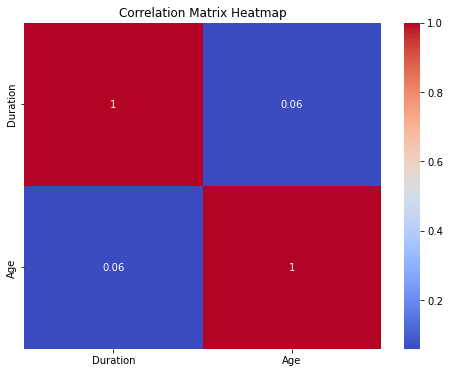

In [18]:
# Select relevant variables for correlation analysis
correlation_vars = ['Duration', 'Age']

# Calculate correlation matrix
correlation_matrix = df_preprocessed[correlation_vars].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


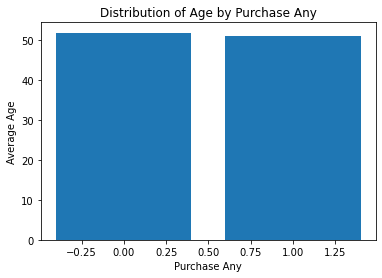

In [19]:
age_by_purchase = df_preprocessed.groupby('purchase_any')['Age'].mean()
plt.bar(age_by_purchase.index, age_by_purchase.values)
plt.xlabel('Purchase Any')
plt.ylabel('Average Age')
plt.title('Distribution of Age by Purchase Any')
plt.show()



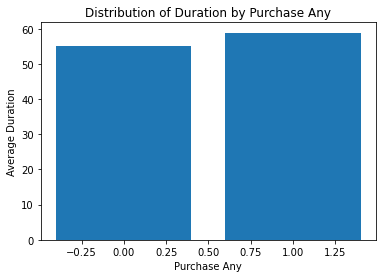

In [20]:
duration_by_purchase = df_preprocessed.groupby('purchase_any')['Duration'].mean()
plt.bar(duration_by_purchase.index, duration_by_purchase.values)
plt.xlabel('Purchase Any')
plt.ylabel('Average Duration')
plt.title('Distribution of Duration by Purchase Any')
plt.show()


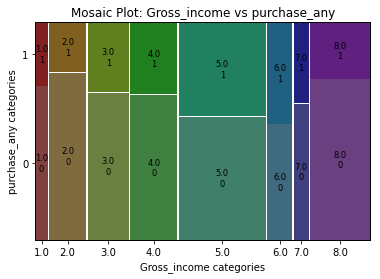

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Create a cross-tabulation of Income and Purchase Any variable
cross_tab = pd.crosstab(df_preprocessed['Gross_income'], df_preprocessed['purchase_any'])

# Create a subplot with the mosaic plot
fig, ax = plt.subplots()
mosaic(cross_tab.stack(), ax=ax, title='Mosaic Plot: Gross_income vs purchase_any')

# Set x and y axis labels
ax.set_xlabel('Gross_income categories')
ax.set_ylabel('purchase_any categories')

# Display the plot
plt.show()


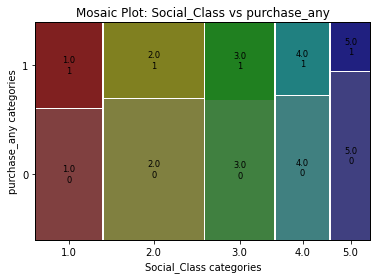

In [22]:
# Create a cross-tabulation of Income and Purchase Any variable
cross_tab = pd.crosstab(df_preprocessed['Social_Class'], df_preprocessed['purchase_any'])

# Create a subplot with the mosaic plot
fig, ax = plt.subplots()
mosaic(cross_tab.stack(), ax=ax, title='Mosaic Plot: Social_Class vs purchase_any')

# Set x and y axis labels
ax.set_xlabel('Social_Class categories')
ax.set_ylabel('purchase_any categories')
# Display the plot
plt.show()

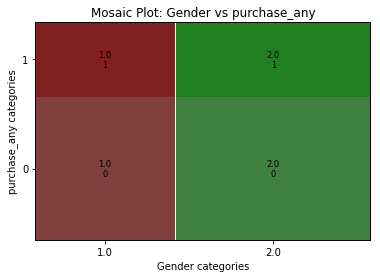

In [23]:
# Create a cross-tabulation of Gender and Purchase Any variable
cross_tab = pd.crosstab(df_preprocessed['Gender'], df_preprocessed['purchase_any'])

# Create a subplot with the mosaic plot
fig, ax = plt.subplots()
mosaic(cross_tab.stack(), ax=ax, title='Mosaic Plot: Gender vs purchase_any')

# Set x and y axis labels
ax.set_xlabel('Gender categories')
ax.set_ylabel('purchase_any categories')

# Display the plot
plt.show()

<Figure size 720x432 with 0 Axes>

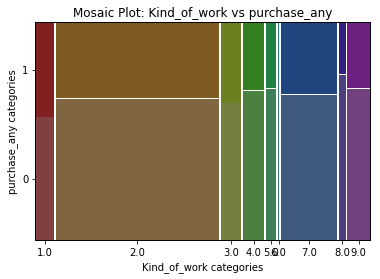

In [24]:
# Create a cross-tabulation of Kind_of_work and Purchase Any variable
cross_tab = pd.crosstab(df_preprocessed['Kind_of_work'], df_preprocessed['purchase_any'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a subplot with the mosaic plot
fig, ax = plt.subplots()
mosaic(cross_tab.stack(), ax=ax, title='Mosaic Plot: Kind_of_work vs purchase_any')

# Remove in-graph labels
for text in ax.texts:
    text.set_visible(False)

# Set x and y axis labels
ax.set_xlabel('Kind_of_work categories')
ax.set_ylabel('purchase_any categories')

# Display the plot
plt.show()

<Figure size 720x432 with 0 Axes>

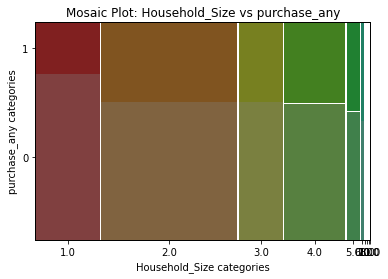

In [25]:
#Create a cross-tabulation of Household_Size and Purchase Any variable
cross_tab = pd.crosstab(df_preprocessed['Household_Size'], df_preprocessed['purchase_any'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a subplot with the mosaic plot
fig, ax = plt.subplots()
mosaic(cross_tab.stack(), ax=ax, title='Mosaic Plot: Household_Size vs purchase_any')


# Remove in-graph labels
for text in ax.texts:
    text.set_visible(False)
    
# Set x and y axis labels
ax.set_xlabel('Household_Size categories')
ax.set_ylabel('purchase_any categories')

# Display the plot
plt.show()

### Modelling

#### 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Select the independent variables and the dependent variable
X = df_preprocessed[['Gross_income', 'Kind_of_work', 'Gender', 'Social_Class', 'Household_Size', 'Age', 'Duration']]
y = df_preprocessed['purchase_any']

# Create an instance of the LogisticRegression model
logreg = LogisticRegression()
#print(logreg)

# Fit the model to the data
logreg.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', logreg.intercept_)
print('Coefficients:', logreg.coef_)


Intercept: [-0.74588947]
Coefficients: [[-0.01321423 -0.01322776 -0.00200276 -0.13059992  0.13622023  0.00355809
   0.00039634]]


/Users/neilbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Hyperparameter tuning

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Select the independent variables and the dependent variable
X = df_preprocessed[['Gross_income', 'Kind_of_work', 'Gender', 'Social_Class', 'Household_Size', 'Age', 'Duration']]
y = df_preprocessed['purchase_any']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Define the hyperparameters and their potential values for tuning
param_grid = {
    'C': [0.01, 0.1, 1.0],          # Inverse of regularization strength (smaller values specify stronger regularization)
    'penalty': ['l1', 'l2'],              # Regularization type ('l1': Lasso, 'l2': Ridge)
}

# Create a GridSearchCV object with the model and hyperparameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


/Users/neilbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/neilbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best Model Accuracy: 0.6561735886886452
Best Hyperparameters: {'C': 1.0, 'penalty': 'l2'}


/Users/neilbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluation

In [30]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report_str)


Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79    258078
           1       0.42      0.00      0.01    134943

    accuracy                           0.66    393021
   macro avg       0.54      0.50      0.40    393021
weighted avg       0.57      0.66      0.52    393021



In [31]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Assuming you have already performed the classification and have y_test and y_pred

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Parse the classification report to get precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the results
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1_score)


Overall Precision: 0.5746460890793548
Overall Recall: 0.6561735886886452
Overall F1-score: 0.5225268066500995


#### 2. Decision Tree

#### Hyperparameter Tuning

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an instance of the DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Define the hyperparameters and their potential values for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]              # Minimum number of samples required to split an internal node
}

# Create a GridSearchCV object with the model and hyperparameters
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search_dt.fit(X_train, y_train)

# Get the best model from the grid search
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the testing data using the best model
y_pred_dt = best_dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Best Decision Tree Model Accuracy:", accuracy_dt)

# Print the best hyperparameters
print("Best Decision Tree Hyperparameters:", grid_search_dt.best_params_)


Best Decision Tree Model Accuracy: 0.8266886502247971
Best Decision Tree Hyperparameters: {'max_depth': 20, 'min_samples_split': 2}


#### Evaluation

In [33]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred_dt)
print('Classification Report:')
print(classification_report_str)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    258078
           1       0.75      0.74      0.75    134943

    accuracy                           0.83    393021
   macro avg       0.81      0.81      0.81    393021
weighted avg       0.83      0.83      0.83    393021



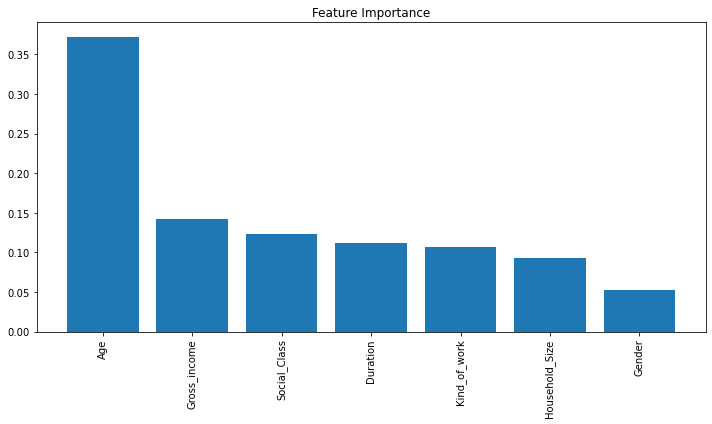

In [34]:
import matplotlib.pyplot as plt

# Get feature importances from the best Decision Tree model
feature_importances = best_dt_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Assuming you have already performed the classification and have y_test and y_pred

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred_dt)

# Parse the classification report to get precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')

# Print the results
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1_score)


Overall Precision: 0.8264970528135223
Overall Recall: 0.8267115497645164
Overall F1-score: 0.8266014087362593


In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have already obtained the best Decision Tree model from the grid search
# You can use 'best_dt_model' as obtained in your code

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, filled=True, feature_names=X_train.columns, class_names=['class_0', 'class_1'])
plt.title("Best Decision Tree Visualization")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 864x576 with 0 Axes>

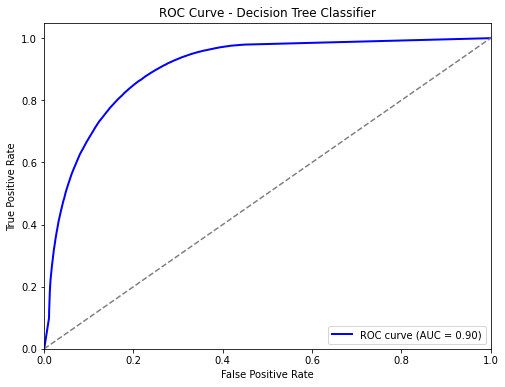

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already obtained the best Decision Tree model from the grid search
# You can use 'best_dt_model' as obtained in your code

# Get the predicted probabilities for the positive class (class_1)
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.86


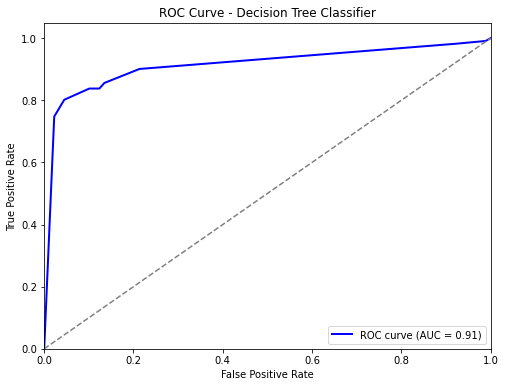

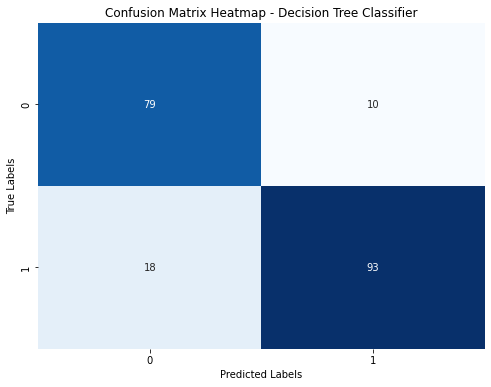

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate sample data (you can replace this with your actual data loading)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

# Make predictions on the testing data using the trained model
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate predicted probabilities for ROC curve
y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Decision Tree Classifier')
plt.show()


#### 3. Random Forest

#### Hyperparameter Tuning

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier model
rf = RandomForestClassifier()

# Define the hyperparameters and their potential values for tuning
param_grid = {
    'n_estimators': [10, 20],              # Number of trees in the forest
    'max_depth': [None, 5, 10]                    # Maximum depth of the tree                  
}

# Create a GridSearchCV object with the model and hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing data using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Model Accuracy:", accuracy_rf)

# Print the best hyperparameters
print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)


Best Random Forest Model Accuracy: 0.8332415695578878
Best Random Forest Hyperparameters: {'max_depth': None, 'n_estimators': 20}


#### Evaluation

In [39]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred_rf)
print('Classification Report:')
print(classification_report_str)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    120149
           1       0.74      0.74      0.74     56028

    accuracy                           0.83    176177
   macro avg       0.81      0.81      0.81    176177
weighted avg       0.83      0.83      0.83    176177



In [40]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Assuming you have already performed the classification and have y_test and y_pred

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred_rf)

# Parse the classification report to get precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

# Print the results
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1_score)


Overall Precision: 0.8333286358468074
Overall Recall: 0.8332415695578878
Overall F1-score: 0.8332847577692991


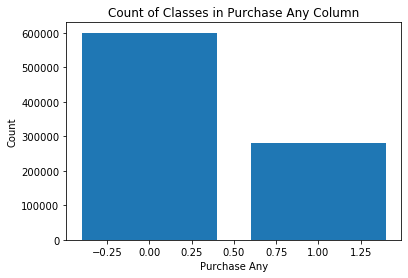

In [57]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'data' and the column name is 'purchase_any'

# Count the occurrences of each class
class_counts = merged_df['purchase_any'].value_counts()

# Get the class labels and their counts
labels = class_counts.index.tolist()
counts = class_counts.values.tolist()

# Create a bar chart
plt.bar(labels, counts)

# Add labels and title to the chart
plt.xlabel('Purchase Any')
plt.ylabel('Count')
plt.title('Count of Classes in Purchase Any Column')

# Show the chart
plt.show()
